# Predcited Heart Disease Diagnoses - DSCI100 Group Project

## Group Members
* Gary Wu 
* Abner Inder Singh Bal
* Taarika Rajani

## Index
* Introduction 
* Dataset Attribute Information
* Reasoning Behind Choosing Column Choice
* Method and Results
* Discussion & Summary
* Citations 

## Introduction

#### Background Information on our topic
* Heart disease is one of the leading causes of death in developed nations as it is considered a lifestyle related disorder (1 person dies every 36 seconds from cardiovascular disease in the US). As rates of heart disease increase and strain medical systems around the world, our group has chosen to explore how we can use predictor variables (in the form of patient data) to predict diagnoses of disease. Perhaps using such data to make predictions can save costs associated with expensive medical testing and can identify patients at greater risk for diagnoses (who could then be allocated further testing resources).

#### Question 
* How can we use predictor variables (specific patient data) to predict the presence of heart disease? Specifically, can age and maximum heart rate data be used to predict patients' heart disease diagnoses? Or in other words how can age and maximum heart rate data influence the prediction of the presence of heart disease?

#### Dataset Description
* The Cleveland Heart Disease Dataset (processed.cleveland.data) contains data on 76 patient attributes related to heart disease. All published experiments have previously used a subset of 14 attributes most relevant to heart disease. The dataset is preprocessed and contains data which is already in a tidy format. Of the 14 columns previously used in experimental analyses we are going to look at the 3 columns: 
age , thalach , and num. We will be using the data from the age and thalach columns as predictors to predict our target variable of num (inidicates the presence and stage of heart disease).


  

## Dataset Attribute Information:
* Only 3 out of  14 columns will be used
 * Age : age in years     
 * thalach : maximum heart rate achieved
 * num : diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% vessel diameter narrowing (no disease)
        -- Value 1: > 50% vessel diameter narrowing (heart disease)
         All values above 1 have been taken as heart disease as all these values essentially mean that observation has heart disease.


## Reasoning Behind Choosing Column Choice

Because we are using a K nearest neighbours classification model in our analysis it does not always make sense to calculate distances between categorical or factorial variables. Based on the feedback on our project proposal we had reassessed the relevance of calculating and interpreting the distance between categorical variables as there are more complicated considerations when intepreting the distance between these variables (for example assigning equal distances to different categories of chest pain which may not differ by equal severity in reality). If we were to rely on the same predictor vairables we had previously considered in our proposal (e.g. chest pain type and resting electrocardiographic results) and used them with the KNN classification algorithm it may result in a relatively low accuracy (again because it doesn’t really make sense to calculate the distance between different categories with a surface level analysis of the values between each category).

As we want to avoid using categorical variables as predictors as they provide unreliable/inaccurate results with a classification model, we were only left with 3 numeric columns in our dataset to consider as alternative predictors. These were age, thalac (maximum heart rate acheived) and chol (serum cholesterol). Studies showed that all these columns may have a relation to heart disease. According to the National Institute on Aging "aging can cause changes in the heart and blood vessels that may increase a person's risk of developing cardiovascular disease", this indicates a positive relationship between age and num (U.S. Department of Health and Human Services). The National Library Of Medicine also states that "maximal exercise-induced heart rate is inversely associated with cardiovascular mortality", this indicates an inverse relation between thalac and num (Sandvik L;Erikssen J;Ellestad M;Erikssen G;Thaulow E;Mundal R;Rodahl K;). 

To further back up these studies we tested all combinations of the 3 predictors with our KNN classification model and achieved a maximum accuracy in predicting num with the combination of age and thalach as predictors.

## Method And Results

#### Part 0 : Configuration And Testing For Maximum Accuracy
* Testing all combinations of predictors to see which combination provides maximum accuracy. The change in accuracy is reflected in Table 4 and figure 2 under part 4 of the code. You can change the predictors of the code by simply uncommenting the combination of predictors you wish to choose. We tested all combinations and received a maximum accuracy when age and thalach were predictors.

In [3]:
# If you want change predictor, change predictors below


# Code part 0, config

#[Note: recipe(target ~ ., data = heart_data_train)
# predictors <- c("age")
# predictors <- c("chol")
# predictors <- c("age", "chol")
# predictors <- c("thalach", "chol")
predictors <- c("age", "thalach")
# predictors <- c("age","chol", "thalach")


# Example: predictors <- c("age", "chol") == 
#          recipe(num ~ age+chol, data = heart_data_train)
# predictors: all predictors

# Remember: change K at Code part 5


# Config - part 6, result visualizing, x_var: x-axis variable name, y_var: y-axis
# If Kernel error, try less dots
enablePart6 <- TRUE
dots <- 50 # suggest 100
# x_var <- "age"
# y_var <- "chol"

x_var <- "age"
y_var <- "thalach"


target <- "num"

default_plot_width <- 8
default_plot_height <- 8

set.seed(1)

# HumanReadableMappingTable <- 
#     data.frame(raw_col=rep(c("age", "chol", "thalach", "num")),
#     readable=rep(c("age_readable", "chol_readable", "thalach_readable", "num_readable"))
#     #, readable_short=rep(c("age_readable", "chol_readable", "thalach_readable", "num_readable"))
#           )

HumanReadableMappingTable <- data.frame(raw_col=character(),
                 readable=character(), 
                 readable_short=character(), 
                 stringsAsFactors=FALSE) 

HumanReadableMappingTable[nrow(HumanReadableMappingTable) + 1, ] <- 
c("age", "Age", "Age")
HumanReadableMappingTable[nrow(HumanReadableMappingTable) + 1, ] <- 
c("num", "Heart Disease?", "Heart Disease?")
HumanReadableMappingTable[nrow(HumanReadableMappingTable) + 1, ] <- 
c("thalach", "thalach_readable", "thalach_readable_s")

# ----------------------------------END CONFIG---------------------------
# make sure x_var, y_var in predictors
if(enablePart6 & !(x_var %in% predictors)){
    stop("x_var not in predictors")
}
if(enablePart6 & !(y_var %in% predictors)){
    stop("y_var not in predictors")
}


HumanReadable <- function(colName){
  readable <- HumanReadableMappingTable %>% 
    filter(raw_col == all_of(colName)) %>% 
    select(readable)
  if ((dim(readable)[1] == 0) || (readable %>% pull() == "NA")){
    stop(sprintf("%s do not have HumanReadable text", colName))
  } else{
    return(readable %>% pull())
  }
}

HumanReadableShort <- function(colName){
  readable_s <- HumanReadableMappingTable %>% 
    filter(raw_col == all_of(colName)) %>% 
    select(readable_short)
  if ((dim(readable_s)[1] == 0) || (readable_s %>% pull() == "NA")){
    stop(sprintf("%s do not have HumanReadableShort text", colName))
  } else{
    return(readable_s %>% pull())
  }
}


#### Part 1 : Loading Library , Wrangling Data And Splitting Into Training And Testing Data

*Here we first load all the libraries in R we will need to loading and wrangle the data. After loading and wrangling our data (which is already tidy) we split the data into a training and testing test with a ratio of 3:1. This leaves us with 25 percent of the data being testing data and 75 percent of the data to train our model with. This split and amount of testing data provides us with a sufficient amount of data  to test the model and also at the same time ensure the code runs fast and without using too too much computational power. If we had a larger testing set, running our model would take significantly longer. Additionally, after speaking with course instructors and TAs as well as consulting the online data science community we found that for a data set like ours an optimal training and testing set split would range from a 70:30 to a 80:20 split. Thus, we have chosen the middle point and used a 75:25 training:testing split. 

In [4]:
# Code part 1, load libraries, read data, wrangle data and split data.

library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(tidymodels)
library(GGally)
library(cowplot)
options(repr.matrix.max.rows = 10)
options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)


#reading our data 
#Can we explain what the mutate steps are doing and why - the TA may not know, what are we doing here with the 
#append or as.factor?- Taarika$

heart_disease_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data <- read_csv(heart_disease_url, col_names = col_names) %>%
    map_df(as.double) %>%
    mutate(num=case_when(num == 0 ~ 0, TRUE ~ 1)) %>%
    mutate(cp=case_when(cp == 1 ~ 2, TRUE ~ cp)) %>%
    mutate(target=as.factor(get(target))) %>%
    select(all_of(append(predictors, "target"))) %>%
    na.omit()
names(heart_data)[names(heart_data) == "target"] <- target

#Splitting our data into the training and testing data set 

df_split <- initial_split(heart_data, prop = 0.75, strata = all_of(target))
heart_data_train <- training(df_split)
heart_data_test <- testing(df_split)

heart_data_train

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
─

age,thalach,num
<dbl>,<dbl>,<fct>
63,150,0
67,108,1
67,129,1
37,187,0
41,172,0
⋮,⋮,⋮
63,144,1
41,182,0
57,123,1


###### Table 1

* The table above shows all observations in the data set with their age , thalach (max achieved heart rate) and num values (heart disease diagnosis).

#### Part 2 :  Visualizing and Summarize data before analyzing.

* Below we have made a few figures and visualizations to better understand the relation between our predictors and num values .

In [5]:
# Code part 2, Visualizing and summarizing data before analyzing.

count_num <- group_by(heart_data_train) %>%
            summarize(count = n()) %>%
            pull()
print(paste("Total observations:", count_num))
summarize_by_target <- heart_data_train %>% 
    group_by(get(target)) %>%
    summarize(count = n())
names(summarize_by_target)[names(summarize_by_target) == "get(target)"] <- target
summarize_by_target
for (i in predictors){
    means <- map_df(heart_data_train %>% select(all_of(i)), mean) %>% pull()
    sds <- map_df(heart_data_train %>% select(all_of(i)), sd) %>% pull()
    max <- map_df(heart_data_train %>% select(all_of(i)), max) %>% pull()
    min <- map_df(heart_data_train %>% select(all_of(i)), min) %>% pull()
    print(sprintf("%s: Mean is: %.2f, Max is %.1f, Min is %.1f", HumanReadableShort(i), means, max, min))
    # print(sprintf("Standard deviation of: %s is: %.2f", HumanReadableShort(i), sds))
}

[1] "Total observations: 228"


`summarise()` ungrouping output (override with `.groups` argument)



num,count
<fct>,<int>
0,123
1,105


[1] "Age: Mean is: 54.20, Max is 77.0, Min is 34.0"
[1] "thalach_readable_s: Mean is: 149.77, Max is 159.0, Min is 162.0"


###### Table 2

* The table above displays the count of num values 0 (no heart disease ) and 1 ( heart disease ) in seperate rows .
* We can see here that we have a near equal split of patients with or without a heart disease diagnosis. Thus, this further supports that it is very important to be able to predict and distinguish between the two as large populations fall into either group and we cannot make a very good guess of which group that will be based on just base rate data or population prevalence.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



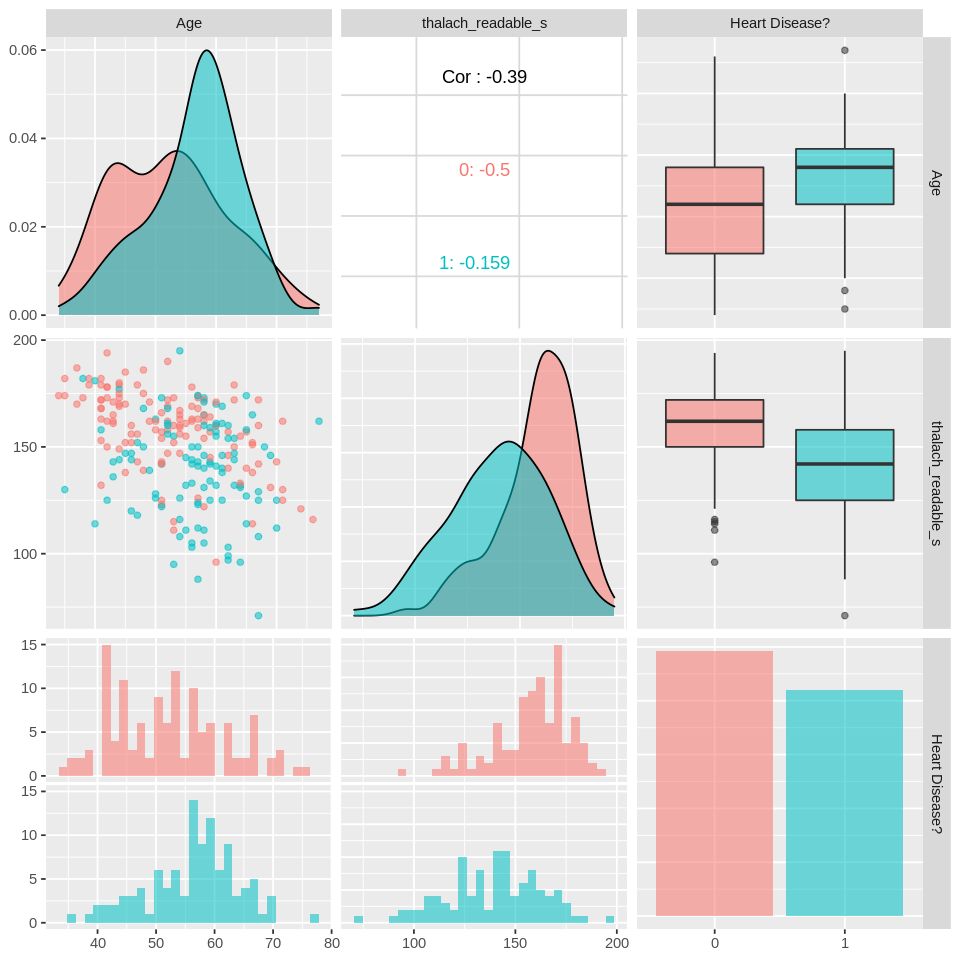

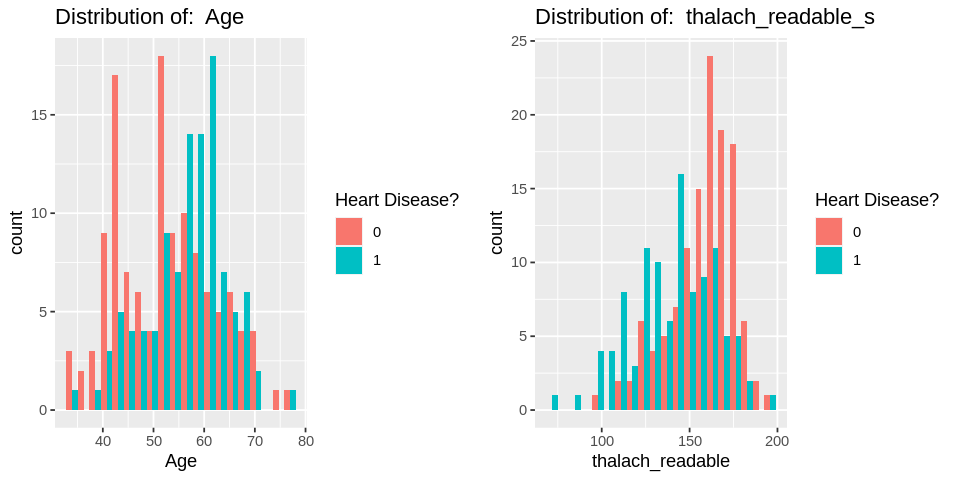

In [6]:
heart_data_train2 <- heart_data_train
names(heart_data_train2) <- map_chr(names(heart_data_train2), HumanReadableShort)
ggpairs(heart_data_train2,
  mapping=aes(colour = get(HumanReadableShort(target)), alpha=0.4))
rm(heart_data_train2)



histogramPlot <- function(p){
  ggplot(heart_data_train, aes(x=get(p), fill = get(target))) +
    geom_histogram(bins=20, position = "dodge") +
    labs(x=HumanReadable(p), fill=HumanReadableShort(target)) +
    ggtitle(paste("Distribution of: ", HumanReadableShort(p)))
}

options(repr.plot.width = default_plot_width, repr.plot.height = (default_plot_height/2) * ceiling(length(predictors)/2))
plot_grid(plotlist = map(predictors, histogramPlot), ncol = 2)
options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)

###### Figure 1

* We have made a group of visualizations to show the relation between age, thalach, and num . According to the visualizations - especially the box plots - we can see people who are older have a higher chance of heart disease and people who have lower thalach ( maximum heart rate) have a higher chance of heart disease, this can be seen across most of the graphs. In the distribution graphs of age and thalach we can see a similar trend where lower thalac readings ( max heart rate) have a higher count of heart disease (num value 0) and higher age readings have a higher count of heart disease (num value 0). These results back up or are in line with the findings from the studies mentioned earlier in our report.
* We used ggpairs to represent the relation between our predictors and num , as ggpairs displays data in many different formats allowing us to view the relationship in an unbiased and broad way. giving a more legitimate conclusion than a single format of visualization which may exaggerate or understate the relation.

#### Part 3 : Classification, Tuning Of The Engine 

* In this part of the code we use 5 fold cross validation to train our model as this uses less computational power (compared to using a higher number of folds like 10) and makes the code run faster than if we had chosen 10 fold cross validation. Additionally, after consulting our TAs and instructors, we learned that because our data set is fairly small (around 200 observations) using a 5 fold validation set is sufficient for our needs and increasing the number of folds is likley to have a very small increased benefit in terms of representing all our data fairly.

In [7]:
# Code part 3, Classification, tuning

#creating our recipe and following the best practice of scaling and centering all predictors
heart_recipe <- recipe(as.formula(paste(target, "~ .")), data = heart_data_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

#setting our engine and mode to follow a knn classification model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

#setting up our cross validation sets which we will train and test our model on to compute an accuracies based on all our training data
heart_vfold <- vfold_cv(heart_data_train, v = 5, strata = all_of(target))
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

#creating our workflow using our recipe and model. Here we also apply it to our 5 cross validation sets and collect metrics to assess how well
#our model works

knn_results <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = heart_vfold, grid = gridvals) %>%
  collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6003865,5,0.03631212,Model01
1,roc_auc,binary,0.6001667,5,0.03289916,Model01
2,accuracy,binary,0.6003865,5,0.03631212,Model02
2,roc_auc,binary,0.6483333,5,0.02624626,Model02
3,accuracy,binary,0.6314976,5,0.03690309,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,roc_auc,binary,0.7534286,5,0.02976789,Model48
49,accuracy,binary,0.7015459,5,0.02121450,Model49
49,roc_auc,binary,0.7522302,5,0.02753815,Model49


###### Table 3

#### Part 4 : Analysis Results From Tuning

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,accuracy,binary,0.7322705,5,0.04272793,Model15
16,accuracy,binary,0.7322705,5,0.04272793,Model16
13,accuracy,binary,0.7279227,5,0.04423322,Model13
9,accuracy,binary,0.7237681,5,0.05475764,Model09
10,accuracy,binary,0.7237681,5,0.05475764,Model10
14,accuracy,binary,0.7235749,5,0.04470320,Model14


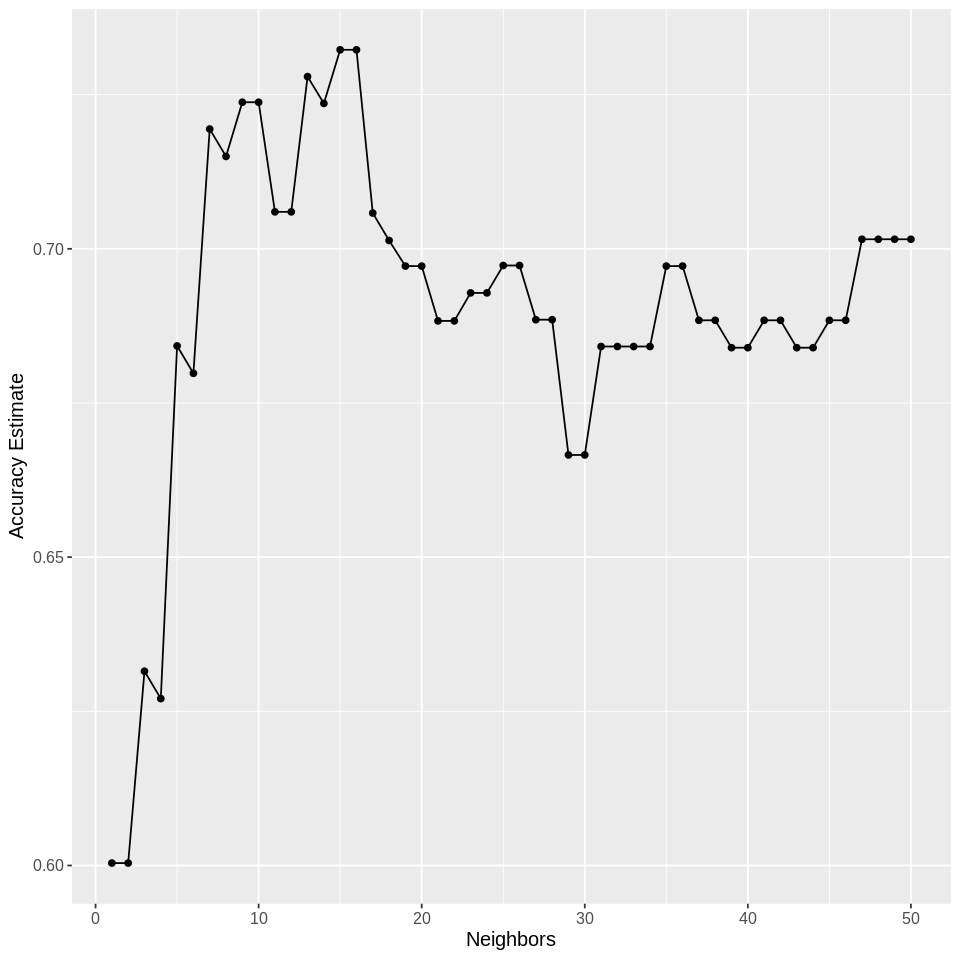

In [8]:
# Code part 4, analyszing our results from tuning

#note from Taarika - I am unsure which 6 rows are getting pulled, why are we pulling these 
#and why in descending order of accurcy - that doesn't make sense. 
accuracies <- knn_results %>%
  filter(.metric == "accuracy") %>% 
  arrange(desc(mean))
head(accuracies , 6)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k
# best_k <- slice(accuracies, 1) %>% 
#   select(neighbors) %>% 
#   pull()

# print(paste("Best k value:", best_k))

###### Table 4 ; Figure 2

* Table 3 shows the various accuracies for different k values.
* In Figure 2 we can see that k = 15 is giving the highest , therefore we will be assigning k = 15 in the next part of the code .

#### Part 5 : Using k With Highest Accuracy In The Classification model

In [23]:
# change k based on the graph.
best_k <- 15

# Code part 5, using best_k to fit our model with
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
  set_engine("kknn") %>%
  set_mode("classification")

#creating a new workflow that uses the most accuracte k value based on our training set
heart_fit <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(knn_spec2) %>%
  fit(heart_data_train)

heart_predict <- predict(heart_fit, heart_data_test) %>%
  bind_cols(heart_data_test) 

#collecting accuracy infomration when we use our model to predict num for the testing data
heart_predict_accuracy <- heart_predict %>%
  metrics(truth = all_of(target), estimate = .pred_class) %>%
  filter(.metric == "accuracy") %>%
  select(.estimate) %>%
  pull()

#creating a confusion matrix to understand false positives and negatives and our model's biases
confusion <- heart_predict %>%
             conf_mat(truth = all_of(target), estimate = .pred_class)

print(paste("Predict Accuracy:", heart_predict_accuracy))
print("confusion map: ")
confusion

[1] "Predict Accuracy: 0.733333333333333"
[1] "confusion map: "


          Truth
Prediction  0  1
         0 30  9
         1 11 25

###### Table 4

* Above we have made a confusion matrix that shows how many observations were assigned correctly. The confusion map below shows that for observations with num value 0, 30 out of 41  observations were assigned correctly and for observations with num value 1, 25 out of 34  observations were assigned correctly. The confusion matrix shows that 11 observations did not have heart disease but were assigned as having heart disease giving us a **false-positive** rate of 11/41 or 0.268 similarly  9 observations that had heart disease were assigned as having no heart disease giving a **false-negative** rate of 9/34 or 0.264, this shows that our code is making similar amounts of errors for predicting both values of num(0 or 1).  We have also obtained a 73% prediction accuracy. While this is good in that we have a much better than the chance level of accuracy with our predictions, in the context of health and major health complications like heart disease this level of accuracy is much too low to base meaningful consequential decisions on. Making a false positive or much worse a false negative error, in this case, has very large implications such as a person not getting the care or treatment they need to stop the disease from progressing. In the future, we must consider other strong predictors to increase our model's accuracy to a better level like above 90% which would be ideal. The implications of our model's accuracy are further discussed in our final summary.


#### Part 6 : Visualizing Final Result 

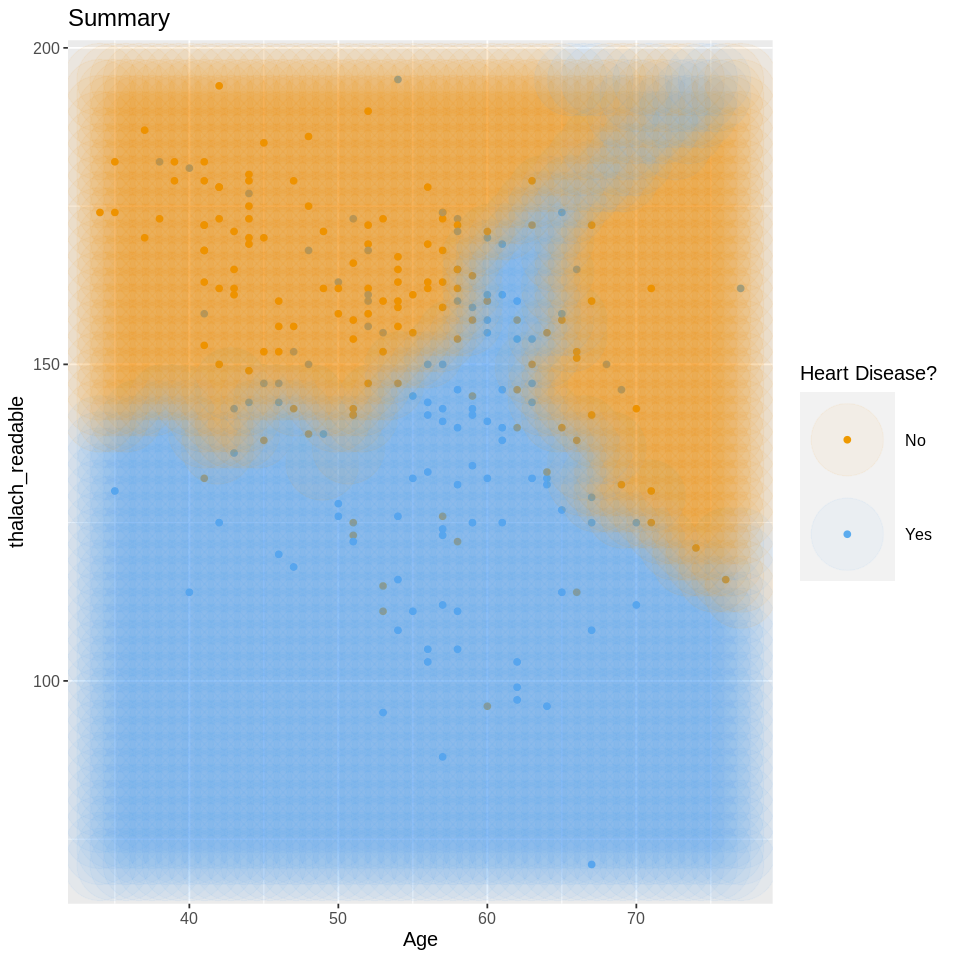

In [91]:
# Code part 6, result visualizing
# Note: some code copyed from textbook 5.8

if (enablePart6){

# x <- heart_data_train[1]
x <- heart_data_train %>% select(all_of(x_var))
# y <- heart_data_train[2]
y <- heart_data_train %>% select(all_of(y_var))

others <- heart_data_train %>% 
    select(-colnames(x), -colnames(y), -all_of(target))  %>% 
    map_df(mean)

x_grid <- seq(min(x), max(x), length.out = dots)
y_grid <- seq(min(y), max(y), length.out = dots)

asgrid <- as_tibble(expand.grid(x = x_grid, y = y_grid)) 
if (!is_empty(others)){
    asgrid <- merge(asgrid, others)
}
names(asgrid)[names(asgrid) == "x"] <- colnames(x)
names(asgrid)[names(asgrid) == "y"] <- colnames(y)

knnPredGrid <- predict(heart_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) #%>% rename(num = .pred_class)
names(prediction_table)[names(prediction_table) == ".pred_class"] <- target

wkflw_plot <- ggplot() +
  geom_point(data = heart_data_train, 
             mapping = aes(x = get(colnames(x)), 
                           y = get(colnames(y)), 
                           color = get(target)), 
             alpha = 1) +
  geom_point(data = prediction_table, 
             mapping = aes(x = get(colnames(x)), 
                           y = get(colnames(y)), 
                           color = get(target)), 
             alpha =  2.5 / dots, 
             size = 1000 / dots) +
  labs(color = HumanReadableShort(target), # "heart disease?"
       x = HumanReadable(x_var),
       y = HumanReadable(y_var)
      ) +
  ggtitle("Summary") +
  scale_color_manual(labels = c("0" = "No", "1" = "Yes"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))

wkflw_plot
}

###### Figure 3

* The summary visualization shows the testing data being assigned to num values 0 (no heart disease) or 1 (heart disease ) and the predictions our model has made. Observations inside the blue region are predicted as having heart disease while observations under the orange region are predicted as having no heart disease.

## Discussion

#### Summary 
*  We have found that as age increases and maximum heart rate acheived decreases (thalach) the chances of heart disease increase. Based on these two predictors we made a classification prediction model which predicts if a person has or does not have heart disease. The testing data contained a total of 75 observations out of which 34  observations had heart disease while 41 did not, Our prediction model assigned 55 observations correctly leading to a 73.3 % accuracy (Table 4). 

  * Out of the 41 observations with no heart disease, 30 were assigned correctly which leads to a 73.2 % accuracy for observations with no heart disease (Table 4) .
   * Out of 41 observations 11 were assigned incorrectly giving a **false-positive** rate of 0.268.
  * Out of the 34 observations with  heart disease, 25 were assigned correctly which leads to a 73.5 % accuracy for observations with heart disease (Table 4) .
   * Out of 34 observations 9 were assigned incorrectly giving a **false-negative** rate of 0.264.


* This shows our classifier is not only a majority classifier but it is assigning observations to both num values 1 and 0 .

#### Where these findings expected ?
* Yes, we had expected a relationship between our predictors and num, Our assumptions were based on past studies which we have mentioned in the report. As we were using a classification model to make predictions we were not able to use much relevant numerical predictor data as there were only 3 numeric columns available in the data set. Although we did expect a relation between the predictors and num we were not able to achieve a higher accuracy due to the lack of numeric biological data available to us.

#### What impact could such findings have ?
* While researching this topic we noticed that there is not much discussion around how maximum heart rate is related to heart disease. We believe such findings could increase the awareness around how a low maximum heart rate could be a strong preliminary sign of heart disease (or at least one that warrants further investigation). Additionally, findings could lead to better recognition of heart disease on the basis of predictor variable data. Our predictor data is very easily obtainable from basic visits in medical settings. If this data could reliably predict diagnoses we could help save medical costs associated with administering heart disease specific expensive medical testing to everyone in the population and can identify patients at greater risk for diagnoses (who could then be allocated further testing resources). Whlie this would be the ideal impact our findings have, because our accuracy of our model is only 73% this is much too low to reliably predict patient outcomes in a health context. In the context of very serious health risks and consequences of heart disease it is simply to risky to use a model with this level of accuracy as it means that people will still be given false healthy and diseased diagnoses based on our classification errors. We must therefore work to improve our model by either using more advanced data science techniques for prediction and also training a new model with better and more predictor variables. Age is a tremendously variable condition where one 80 year old may be in stellar health and another 29 year old very unfit. In order to have a bigger impact we seek to use more specific health data that better link to and represent heart disease symptoms. Levels of cardiac enzymes, troponin levels (troponins are proteins inside heart cells that are released when the cells are damaged by the lack of blood supply to your heart, low-density lipoprotein levels, and complete blood cell count are initial ideas for numerical data that act as early symptoms of heart disease according to medical websites. Moreover these data can be easily gathered using a simple blood test. Thus, these predictors could also be used to make predictions before more costly tests are undertaken. 

#### What future questions could this lead to?
 * Is there a relation between other columns in our data set and num (including ones which have categorical values)? How might we better go about assessing the impact of categorical data on the presence of heart disease? 
 * What combination of attribute data can lead to a more accurate diagnosis of heart disease? Could the expanded predictors we mentioned in our impacts section (Levels of cardiac enzymes, troponin levels, low-density lipoprotein levels, and complete blood cell count) above provide us with a more accurate prediction of heart disease in patients?
 * Do certain attributes act as better predictor variables depending on the age range of the patient? For example in those above 65 do we see certain predictors having a stronger relationship with heart disease (like red and white blood cell count for example)? Do we see different types of variables affecting young people with heart disease (like if cholestorol levels are the best predictor of heart disease in those below 50)?



## Citations Used

1. UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved April 7, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

2. U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. Retrieved April 7, 2022, 
   from https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease 

3. Sandvik L;Erikssen J;Ellestad M;Erikssen G;Thaulow E;Mundal R;Rodahl K; (n.d.). Heart rate increase and maximal heart rate during exercise as predictors 
   of cardiovascular mortality: A 16-year follow-up study of 1960 healthy men. Coronary artery disease. Retrieved April 7, 2022, 
   from https://pubmed.ncbi.nlm.nih.gov/8574463/ 

4. UCSF Health. (2021, September 22). Diagnosing heart disease. ucsfhealth.org. Retrieved April 9, 2022, from https://www.ucsfhealth.org/education/diagnosing-heart-disease 

$note from Taarika$ please cite this in the same way as the others - https://www.ucsfhealth.org/education/diagnosing-heart-disease